# Titianic Task
So today, i decided to take little complex data with different columns. It is Titanic dataset, there are information like sex,age,ticket class, fare and etc. And main point of today's task is to predict survivalibity of passenger based on these features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset analysis

Since data is not that big, it will be easier to upload it here. But if it was a huge dataset, it's better to mount the google drive

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I will remove unnecessary data 'PassengerId', i don't need it as input to the models here.

In [4]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Here we can clearly see that 'Cabin' has huge amount of missing values, that is why dropping entire column is a reasonable choice.
But for the 'Age' column it has substainable number of non-null values,so i will use data imputation. To use imputation there's need to understand distribution of the values, if it's skewed it's better to use *median* since using mean on this occasion may pose risks due to outliers, if it's near symmetrical(normal) distribution in this case i will use *mean*.

<Axes: xlabel='Age', ylabel='Count'>

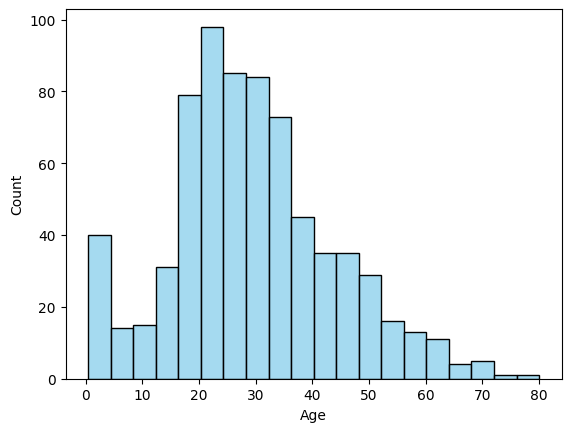

In [7]:
sns.histplot(df['Age'],bins=20,color='skyblue')

As you can see it is skewed so i will use median of the column to fill in missing values.

In [8]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [9]:
df.drop('Cabin', axis=1, inplace=True)

And for 'Embarked' it is better to just use mode of the dat considering that it has onlt 2 missing values.

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

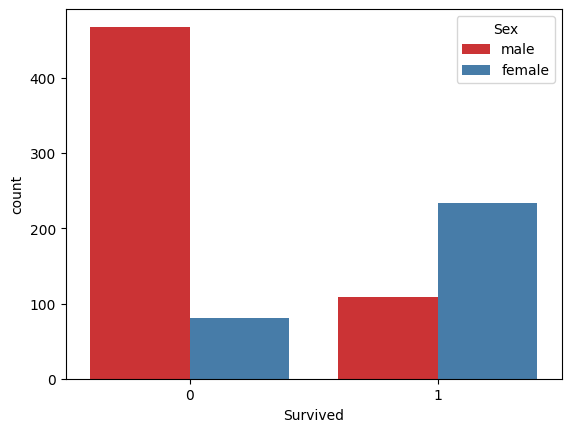

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')

So, from this countplot it's clearly shown that most male didn't survived(more than 400).

Next will check survavibility using the countplot here also but to check for survival based on pclass.

<Axes: xlabel='Survived', ylabel='count'>

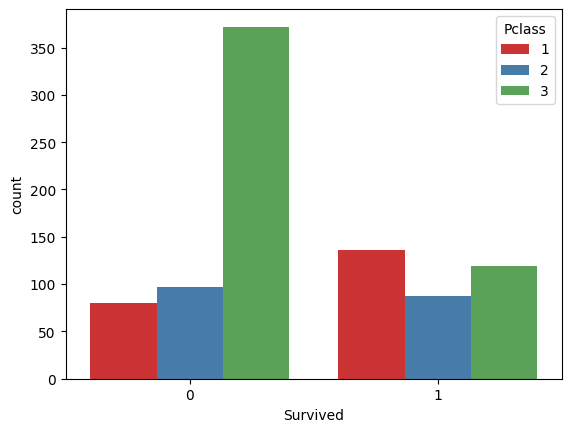

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1')

We can see that huge amount of passengers with third class tickets didn't survive.It can be because third class people were not allowed to sit on rescue boats,because more empahisize was on higher class people.

<Axes: xlabel='Fare', ylabel='Count'>

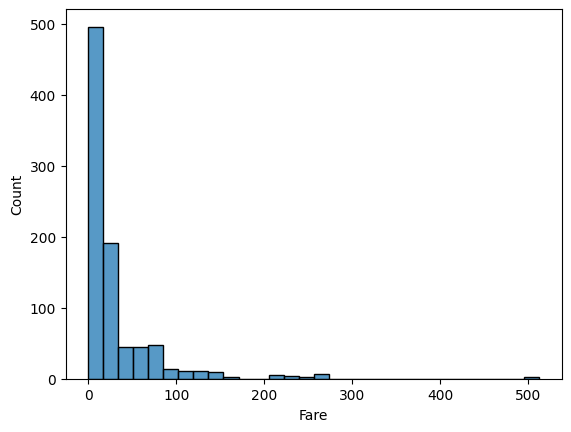

In [14]:
sns.histplot(df['Fare'],bins=30)

Here we see that most people got cheaper tickets, make sense most passengers where in lower budget class

<Axes: xlabel='SibSp', ylabel='count'>

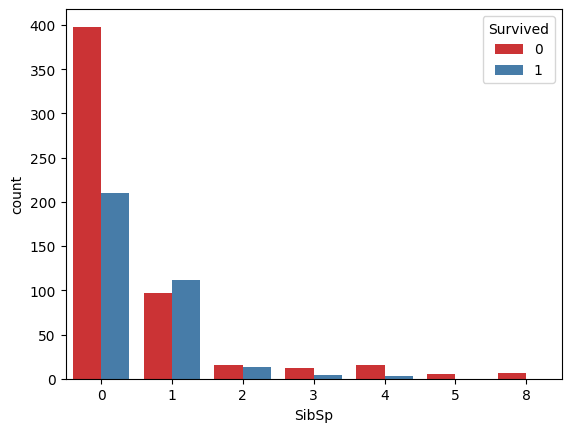

In [15]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = df, palette='Set1')

<ipython-input-16-154042c8fb64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


<Axes: >

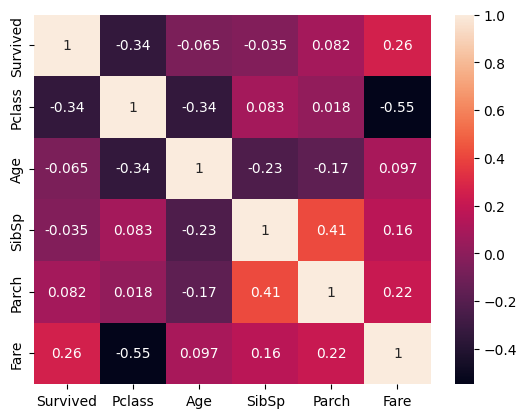

In [16]:
sns.heatmap(df.corr(method='pearson'),annot=True)

# Data Preprocessing
Since dataset has categorical data that will be needed in classification, there's a need to convert them to numerical data.I will use on-hot encoding.

In [17]:
data = pd.get_dummies(df)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
X = data.iloc[:, 1:].values
X

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [19]:
y = data.iloc[:, :1].values
y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=5)

# Logistic regression

I already did LogReg in my first day, but i think i forgot to explain what it is.So now i will shortly explain this algorithm.

Logistic regression is on of the supervised classification method. It is also one of the eager learner, Logistic Regression will spend most of their time  training a model on given train data because of it is eagerness to have better generalization, and test the model on unseen data,usually it takes little time.It is a binary classification,that will have 2 values as output. It will assign data points to given classes by making probabilities using sigmoid function.


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01)

In [22]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

Now let's see the metrics of Logistic Regression. As usual conf matrix,accuracy,recall and precision

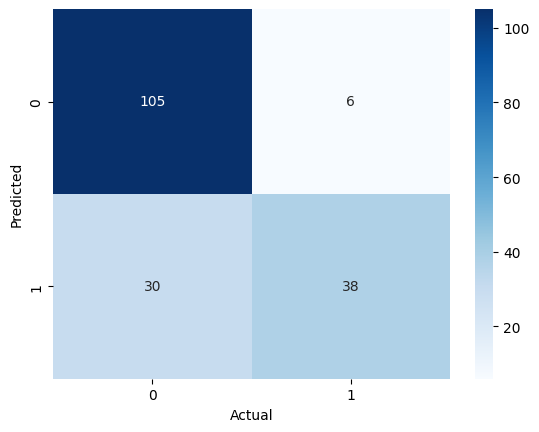

In [28]:
from sklearn.metrics import confusion_matrix

cfm_lr = confusion_matrix(y_test,lr_pred)
sns.heatmap(cfm_lr,annot=True, fmt='d',cmap='Blues') #fmt is to specify the format of annotaion, in this case 'd' means integer

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Confusion matrix of Logistic Regression shows that


1.   The model accurately classified 105 instances that were actually non-survivors, but misclassified 30 of them as survivors.
2.   For the survivors it correctly classified 38 of them, 6 were wrongly classfiied as non-survivors

(i will talk about results of evaluation in the end in report,comparing different models)



In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       111
           1       0.86      0.56      0.68        68

    accuracy                           0.80       179
   macro avg       0.82      0.75      0.77       179
weighted avg       0.81      0.80      0.79       179



In [88]:
lr_acc = lr.score(X_test,y_test)
lr_acc

0.7988826815642458

# KNN

K-nearest neighbors(KNN) is a supervised classification method, but unlike Logistic Regression it is not *eager learner*, it is a *lazy learner*. Lazy learners do not create a model, it just memorizes train data,and then when test set was given it will just try to find nearest neighbor. That is why it is much slower than eager learners.

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [67]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

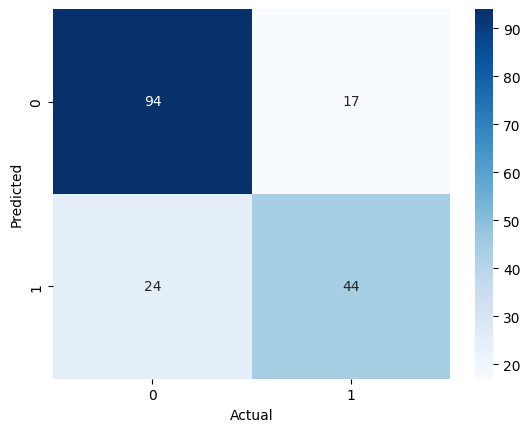

In [68]:
cfm_knn = confusion_matrix(y_test,knn_pred)
sns.heatmap(cfm_knn, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Observation of KNN confusion matrix:


1.   It predicted 94 non-survivors correctly, but mistook 24 non-survivors as survivor
2.   44 survivors were correctly predicted, but model predicted 17 survivors as non-survivors.

(i will talk about results of evaluation in the end in report,comparing different models)



In [69]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.72      0.65      0.68        68

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [87]:
knn_acc = knn.score(X_test,y_test)
knn_acc

0.770949720670391

# SVM

Support Vector Machines - same as other is a supervised classification algorithm.
It's an eager learner. First it will create a model to train on training set, then will make prediction on new/unseen data.

In [34]:
from sklearn.svm import SVC #SVC stands for support vector classifier, distinguishing it from other SVM variants like those for regression(SVR).

svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [36]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

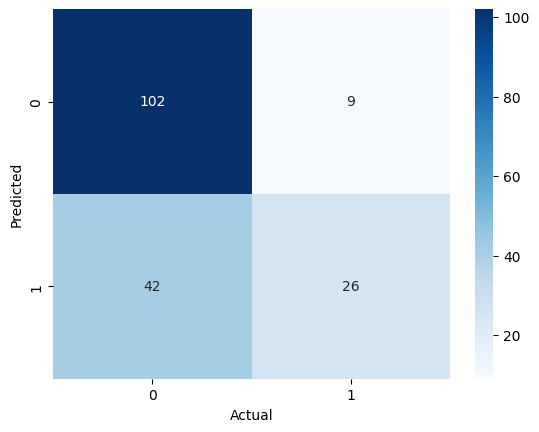

In [38]:
cfm_svm = confusion_matrix(y_test,svm_pred)

sns.heatmap(cfm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [43]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       111
           1       0.74      0.38      0.50        68

    accuracy                           0.72       179
   macro avg       0.73      0.65      0.65       179
weighted avg       0.72      0.72      0.69       179



In [86]:
svm_acc = svm.score(X_test,y_test)
svm_acc

0.7150837988826816

# Decision Tree

Supervised Classification methos, one of the eager learners.

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])

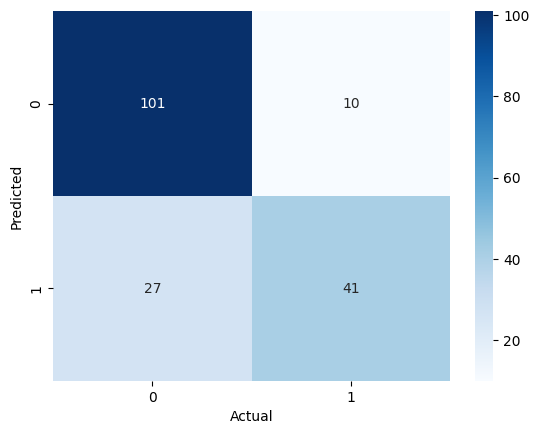

In [79]:
cfm_dtc = confusion_matrix(y_test,dtc_pred)
sns.heatmap(cfm_dtc, annot=True,fmt='d', cmap='Blues')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Observation based on DecisionTree confusion matrix:


1.   101 instances of non-survivors were correctly predicted, but 27 instances were incorrectly predicted as survivors.
2.   The decision tree erroneously classified 10 survivors as non-survivors, but accurately classified 41 survivors.



In [80]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       111
           1       0.80      0.60      0.69        68

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



In [85]:
dtc_acc = dtc.score(X_test,y_test)
dtc_acc

0.7932960893854749

# Results(Report)

In [95]:
accuracies = {
    'Logistic Regression':lr_acc,
    'KNN':knn_acc,
    'SVM':svm_acc,
    'Decision tree':dtc_acc
}

for model,accuracy in accuracies.items():
  print(f"{model} accuracy is {accuracy}")

Logistic Regression accuracy is 0.7988826815642458
KNN accuracy is 0.770949720670391
SVM accuracy is 0.7150837988826816
Decision tree accuracy is 0.7932960893854749


In this task, i compared the performance of four machine learning models(Logistic Regression,KNN, SVM, Decision Tree) in predicting the survivors in a Titanic based on features like age,gender and etc.

From accuracies and other metrics like f1 score,recall and precision. It is clearly seen that **Logistic Regression** will be the best choice for this task.Although **Decision Tree** might be a good choice too,since it is only little behind Logistic Regression.

Tomorrow i will take this same models, but will make a visualiztion of each of the model, to see the decision boundry and observe all the differences.